<a href="https://colab.research.google.com/github/mikiya1130/world_model/blob/mikiya1130%2Fanalysis/temp/analysis_of_coordinates_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PROJECT_DIR = '/content/drive/MyDrive/world_model'
DATA_DIR = os.path.join(PROJECT_DIR, 'data')

In [4]:
df = pd.read_csv(os.path.join(DATA_DIR, 'all.csv'), index_col=0)
df

,latitude,longtitude,compass_direction,x,y,z
0,40.440309,-80.000000,115.74,8.412018e+05,-4.770692e+06,4.128692e+06
1,40.440271,-80.006800,119.24,8.406360e+05,-4.770795e+06,4.128689e+06
2,40.440229,-80.006700,118.96,8.406449e+05,-4.770796e+06,4.128686e+06
3,40.440189,-80.006600,118.68,8.406537e+05,-4.770798e+06,4.128682e+06
4,40.440146,-80.006500,118.40,8.406626e+05,-4.770799e+06,4.128678e+06
...,...,...,...,...,...,...
10338,40.730550,-74.001715,2.63,1.329346e+06,-4.636504e+06,4.153179e+06
10339,40.730751,-74.001597,2.63,1.329352e+06,-4.636487e+06,4.153196e+06
10340,40.730845,-74.001541,2.49,1.329354e+06,-4.636480e+06,4.153204e+06
10341,40.730932,-74.001490,2.35,1.329357e+06,-4.636472e+06,4.153211e+06


# データセット内の地点と方角の分析

## 全ての地点を可視化

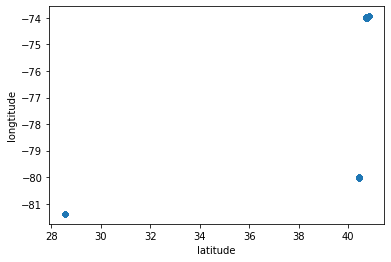

In [5]:
df.plot.scatter(x='latitude', y='longtitude')

### 塊ごとに可視化

df_group_1: 1324
df_group_2: 3078
df_group_3: 5941


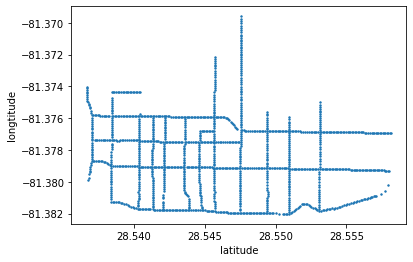

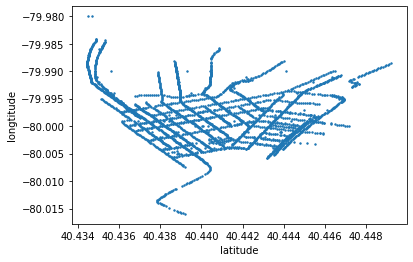

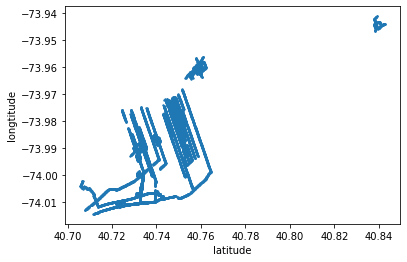

In [6]:
df_group_1 = df[df['latitude'] <= 34]
df_group_1.plot.scatter(x='latitude', y='longtitude', s=2)
df_group_2 = df[~(df['latitude'] <= 34) & (df['longtitude'] <= -77)]
df_group_2.plot.scatter(x='latitude', y='longtitude', s=2)
df_group_3 = df[~(df['latitude'] <= 34) & ~(df['longtitude'] <= -77)]
df_group_3.plot.scatter(x='latitude', y='longtitude', s=2)

print('df_group_1:', len(df_group_1))
print('df_group_2:', len(df_group_2))
print('df_group_3:', len(df_group_3))

### 3つ目を更にそれぞれ可視化

df_group_3a: 5375
df_group_3b: 425
df_group_3c: 141


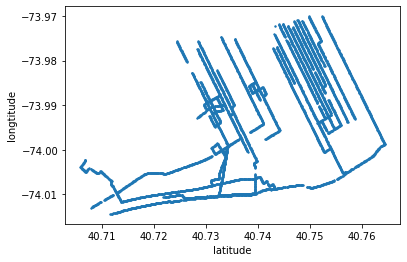

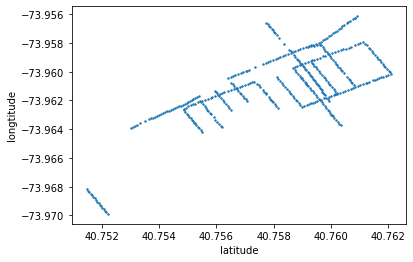

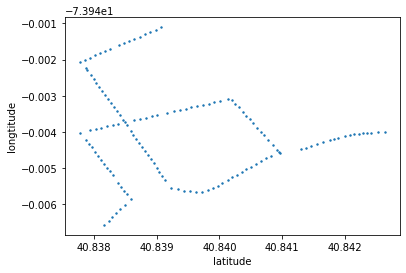

In [7]:
df_group_3a = df_group_3[df_group_3['longtitude'] <= -73.97]
df_group_3a.plot.scatter(x='latitude', y='longtitude', s=2)
df_group_3b = df_group_3[(df_group_3['latitude'] <= 40.80) & ~(df_group_3['longtitude'] <= -73.97)]
df_group_3b.plot.scatter(x='latitude', y='longtitude', s=2)
df_group_3c = df_group_3[~(df_group_3['latitude'] <= 40.80) & ~(df_group_3['longtitude'] <= -73.97)]
df_group_3c.plot.scatter(x='latitude', y='longtitude', s=2)

print('df_group_3a:', len(df_group_3a))
print('df_group_3b:', len(df_group_3b))
print('df_group_3c:', len(df_group_3c))

## 最初のグループを使うのが良さそう

- index: 3078〜4401
  - 画像ファイルのファイル名では 3079〜4402
  - `part3.zip` と `part4.zip` と `part5.zip` が該当
  - DL: http://www.cs.ucf.edu/~aroshan/index_files/Dataset_PitOrlManh/zipped%20images/

In [8]:
index_group_1 = df_group_1.index.values.tolist()
print('min:', min(index_group_1))
print('max:', max(index_group_1))
print('max-min+1:', max(index_group_1) - min(index_group_1) + 1)
print('len:', len(index_group_1))

min: 3078
max: 4401
max-min+1: 1324
len: 1324


## 画像ファイルの番号と地点の対応 (参考)

- 紫から赤の順に撮影 (保存) されてある

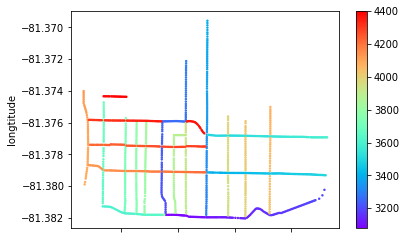

In [9]:
df_group_1.plot.scatter(x='latitude', y='longtitude', s=2, c=df_group_1.index, colormap='rainbow')

## compass_direction の分布

- 北を 0° として、基準の画像 (ファイル番号4) がどれだけ回転しているか
  - 0° 近辺と 90° 近辺に集中
  - 1枚だけ 180° 辺りの画像がある

つまり、おおまかに以下2パターンのデータがある
- ファイル番号4: 北、ファイル番号3: 西、ファイル番号2: 南、ファイル番号1: 東
- ファイル番号4: 東、ファイル番号3: 北、ファイル番号2: 西、ファイル番号1: 南

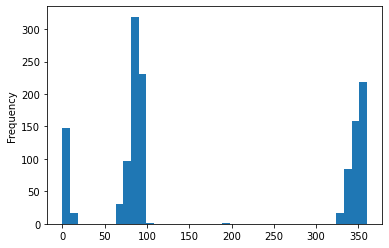

In [10]:
df_group_1['compass_direction'].plot.hist(bins=40)

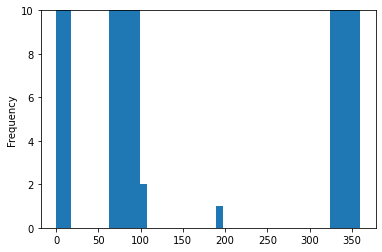

In [11]:
df_group_1['compass_direction'].plot.hist(bins=40, ylim=(0, 10))

## マップ上の各地点はどの方角を基準として撮影しているか

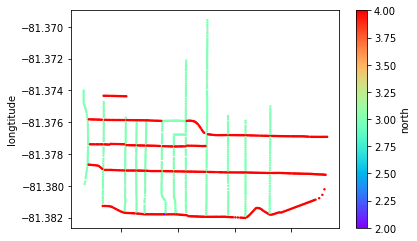

In [12]:
def north_img_num(dir):
    if dir < 50 or 300 < dir:
        return 4
    elif 50 < dir < 150:
        return 3
    else:
        return 2

df_direction = pd.DataFrame(index=df_group_1.index, columns=['north', 'west', 'south', 'east'])
df_direction['north'] = df_group_1['compass_direction'].map(north_img_num)
df_direction['west'] = df_direction['north'].map(lambda x: (x + 2) % 4 + 1)
df_direction['south'] = df_direction['north'].map(lambda x: (x + 1) % 4 + 1)
df_direction['east'] = df_direction['north'].map(lambda x: (x) % 4 + 1)
df_group_1_with_dir_num = df_group_1.join(df_direction)
df_group_1_with_dir_num.plot.scatter(x='latitude', y='longtitude', s=2, c='north', colormap='rainbow')

- 赤：ファイル番号 {1: 東, 2: 南, 3: 西, 4: 北}
- 緑：ファイル番号 {1: 南, 2: 西, 3: 北, 4: 東}
- 紫：ファイル番号 {1: 西, 2: 北, 3: 東, 4: 南}

## index・画像と基準方角の対応関係

In [13]:
def grouping_sequencial(l):
    result = []
    start = l[0]
    for i in range(len(l)-1):
        if l[i+1] - l[i] == 1:
            continue
        result.append((start, l[i]))
        start = l[i+1]
    result.append((start, l[-1]))
    return result

print('北がファイル番号2:', grouping_sequencial(df_group_1_with_dir_num[df_group_1_with_dir_num['north'] == 2].index.tolist()))
print('北がファイル番号3:', grouping_sequencial(df_group_1_with_dir_num[df_group_1_with_dir_num['north'] == 3].index.tolist()))
print('北がファイル番号4:', grouping_sequencial(df_group_1_with_dir_num[df_group_1_with_dir_num['north'] == 4].index.tolist()))

北がファイル番号2: [(3844, 3844)]
北がファイル番号3: [(3202, 3399), (3648, 3843), (3845, 4129)]
北がファイル番号4: [(3078, 3201), (3400, 3647), (4130, 4401)]


- index: 3078〜3201 (画像ファイル: 3079〜3202) は、ファイル番号4が北方向を撮影した画像
- index: 3202〜3399 (画像ファイル: 3203〜3400) は、ファイル番号3が北方向を撮影した画像
- index: 3400〜3647 (画像ファイル: 3401〜3648) は、ファイル番号4が北方向を撮影した画像
- index: 3648〜3843 (画像ファイル: 3649〜3844) は、ファイル番号3が北方向を撮影した画像
- index: 3844 (画像ファイル: 3845) は、ファイル番号2が北方向を撮影した画像
- index: 3845〜4129 (画像ファイル: 3846〜4130) は、ファイル番号3が北方向を撮影した画像
- index: 4130〜4401 (画像ファイル: 4131〜4402) は、ファイル番号4が北方向を撮影した画像